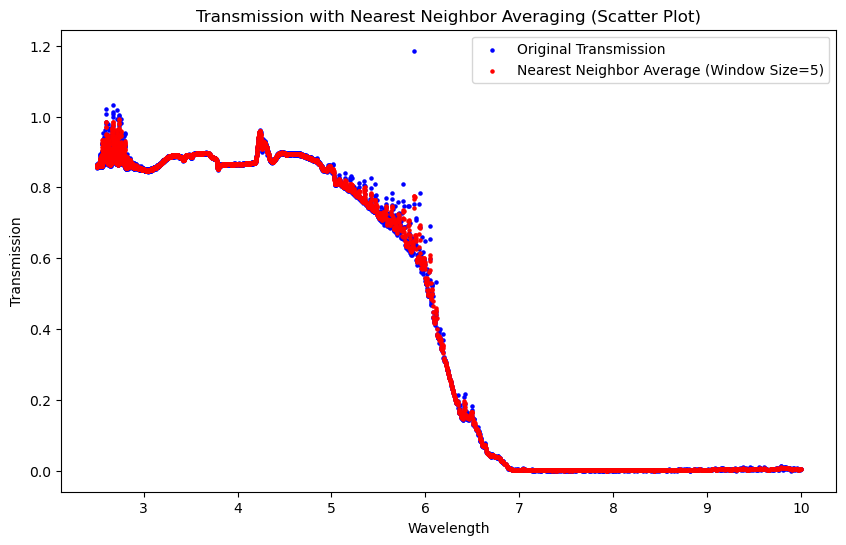

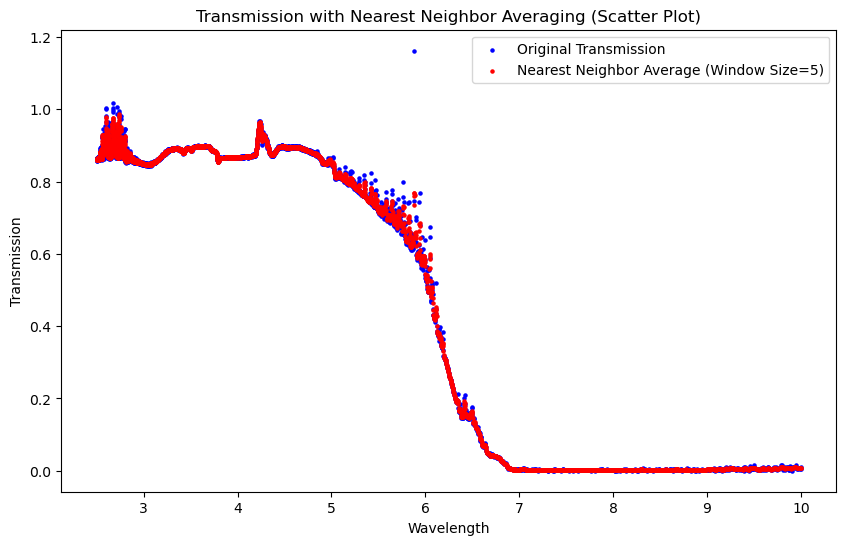

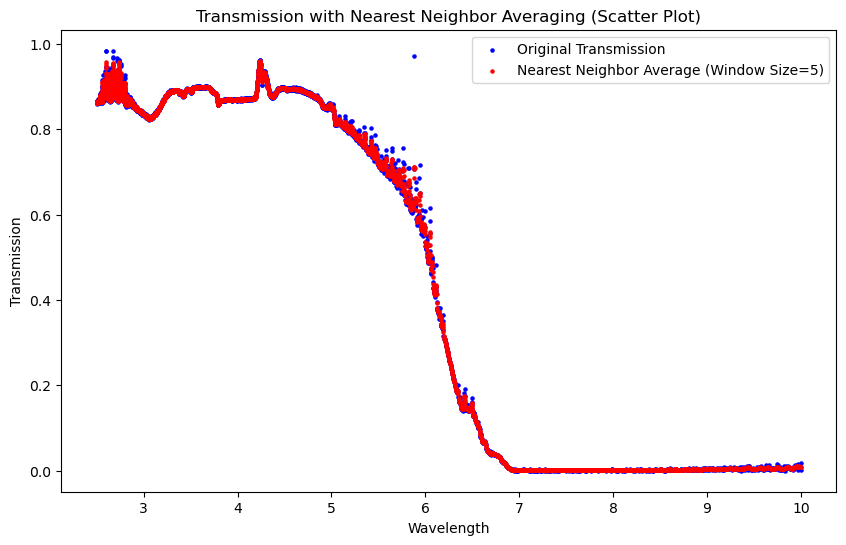

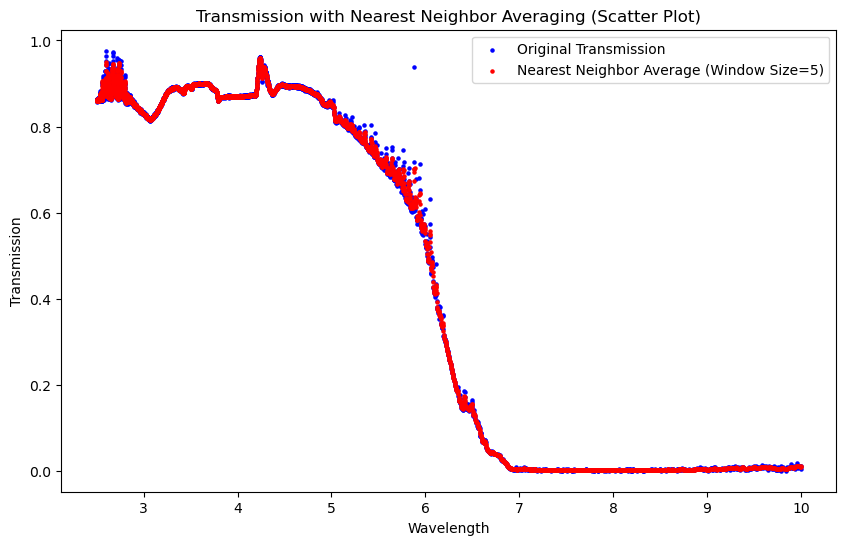

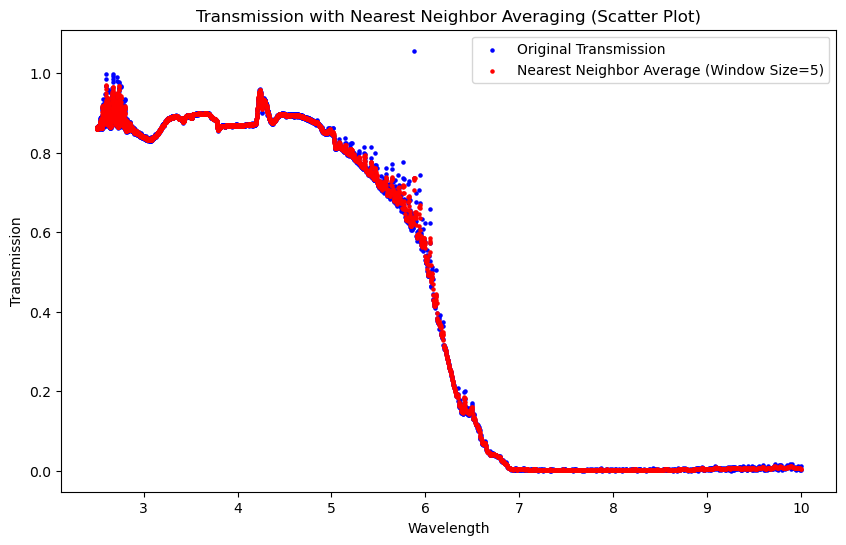

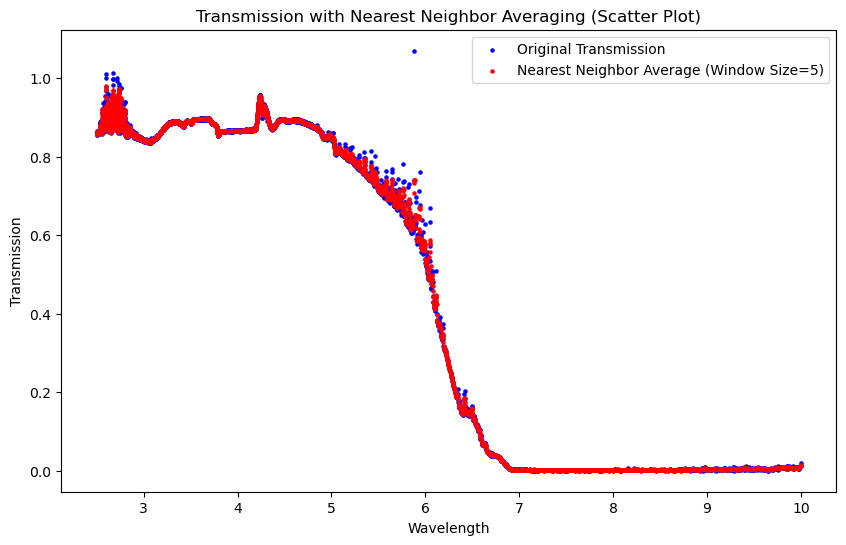

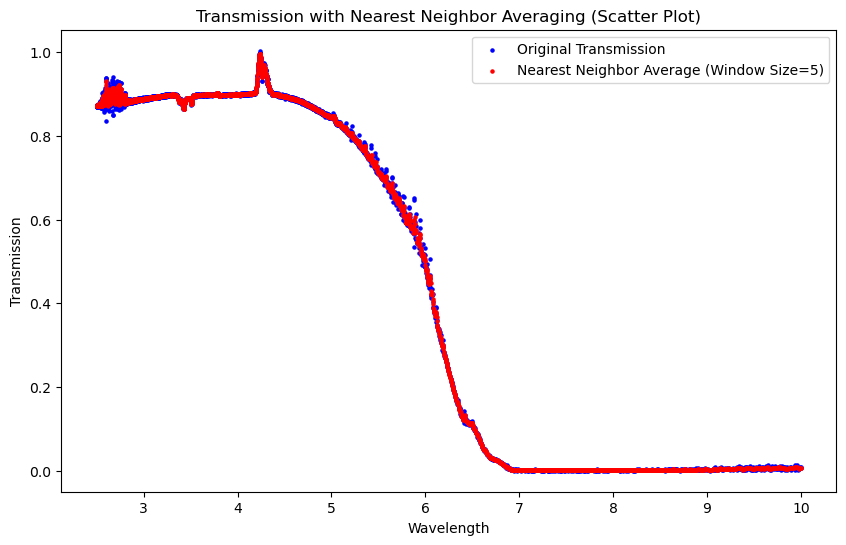

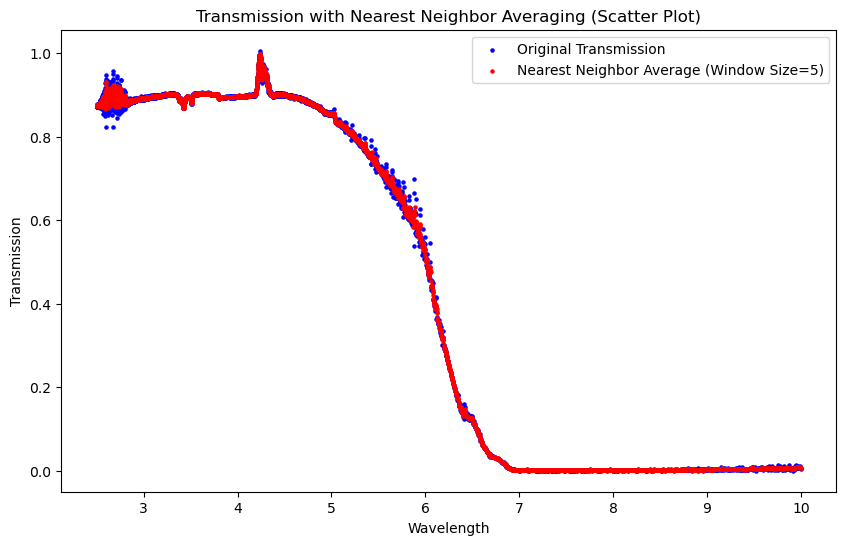

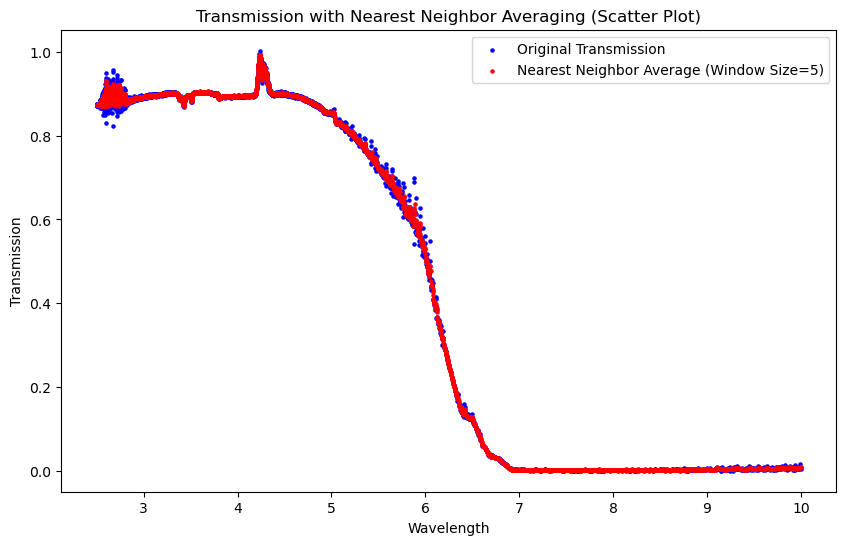

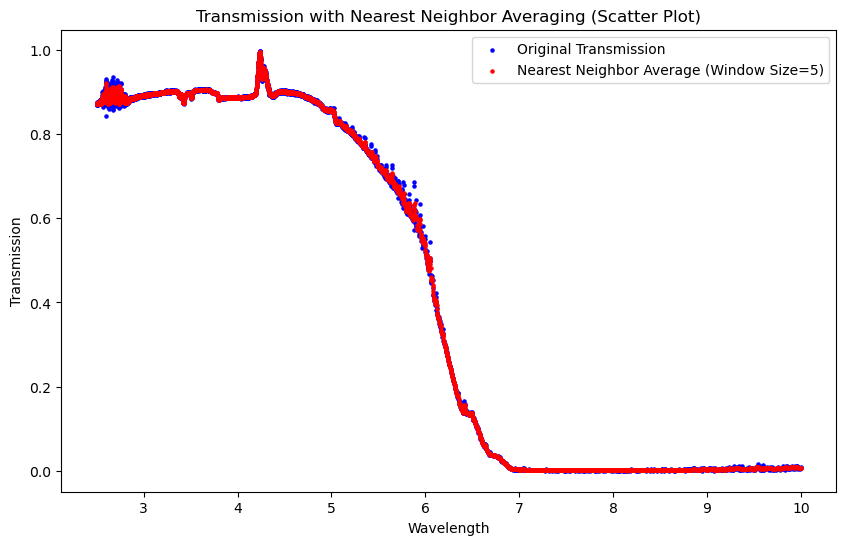

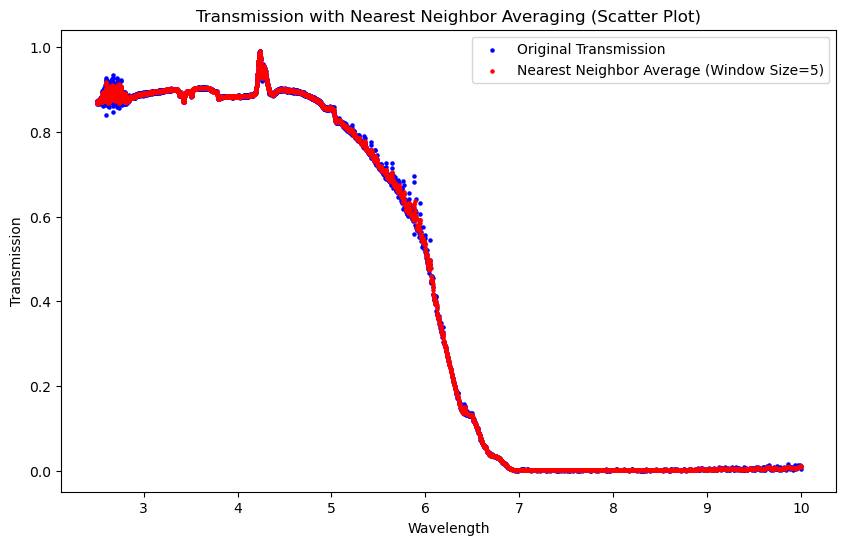

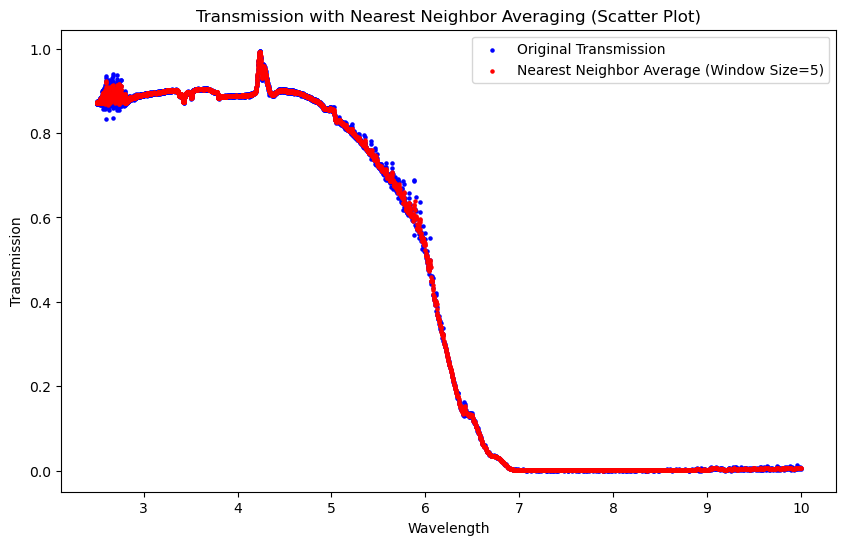

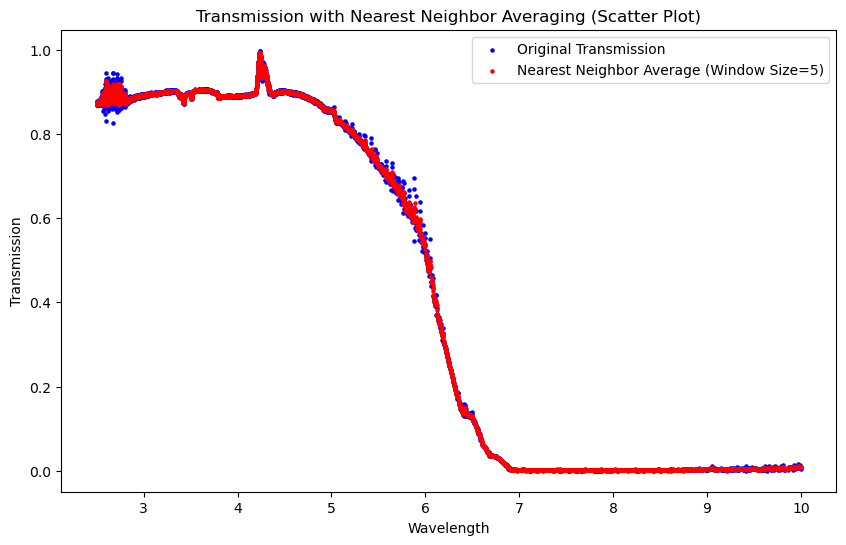

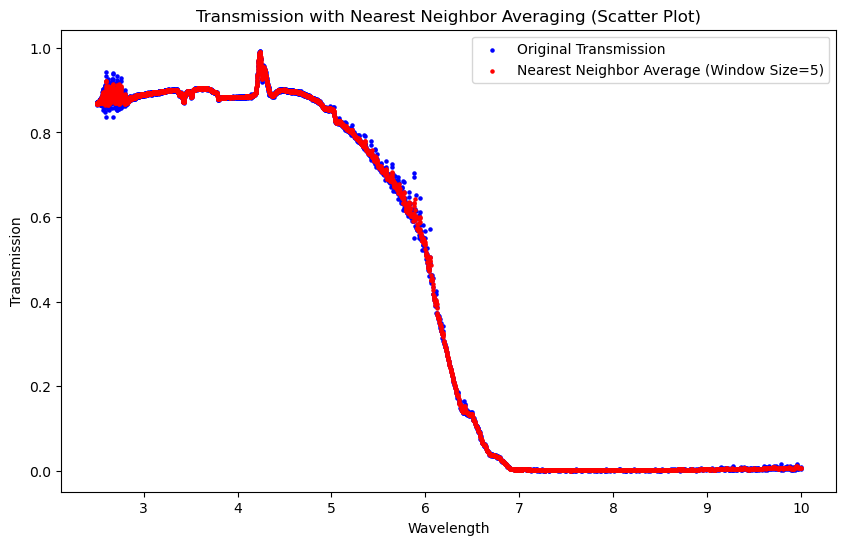

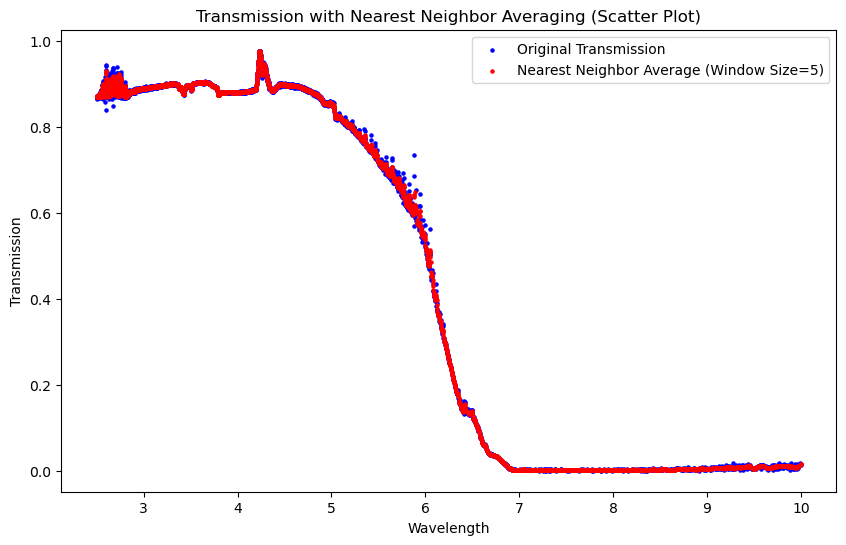

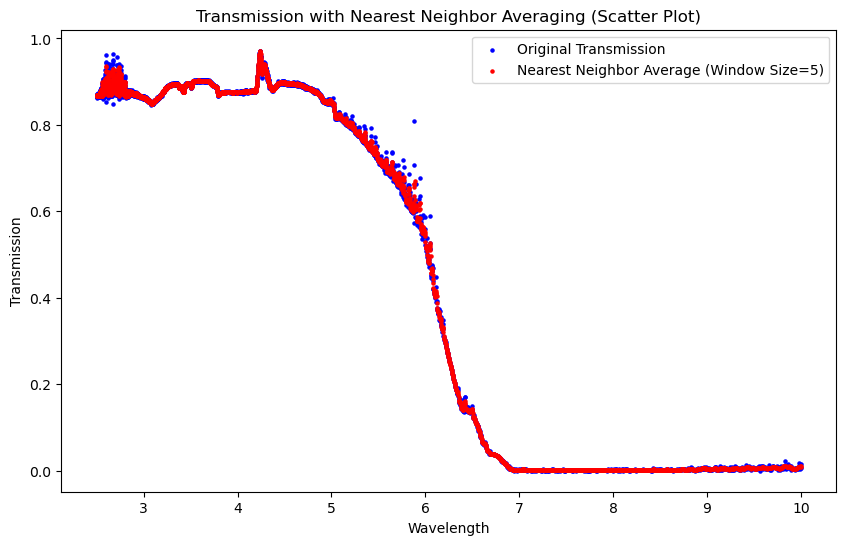

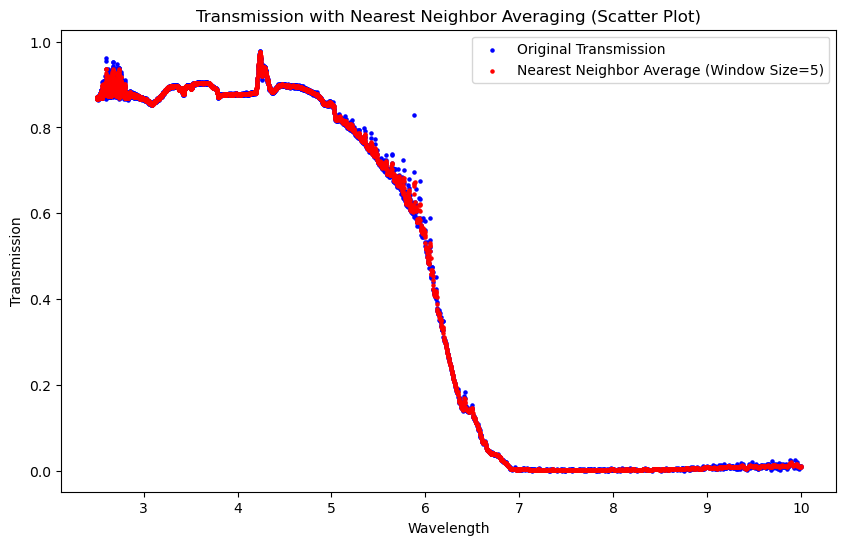

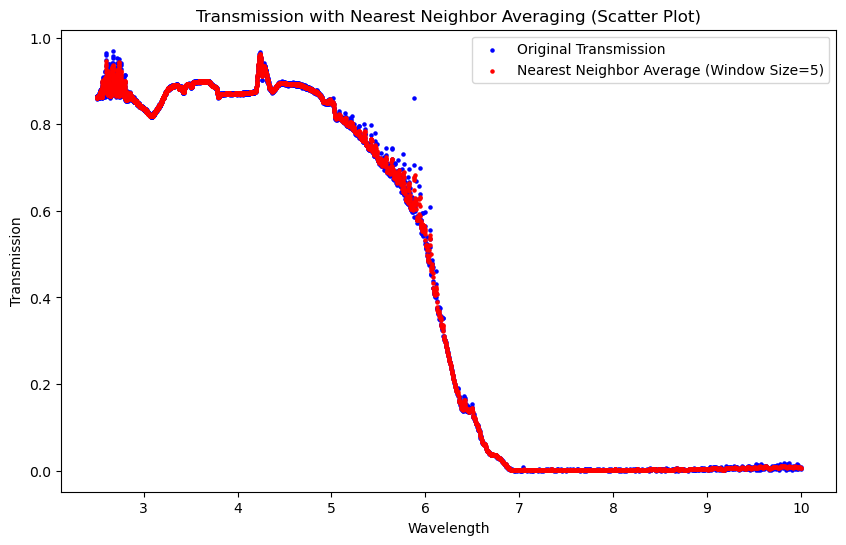

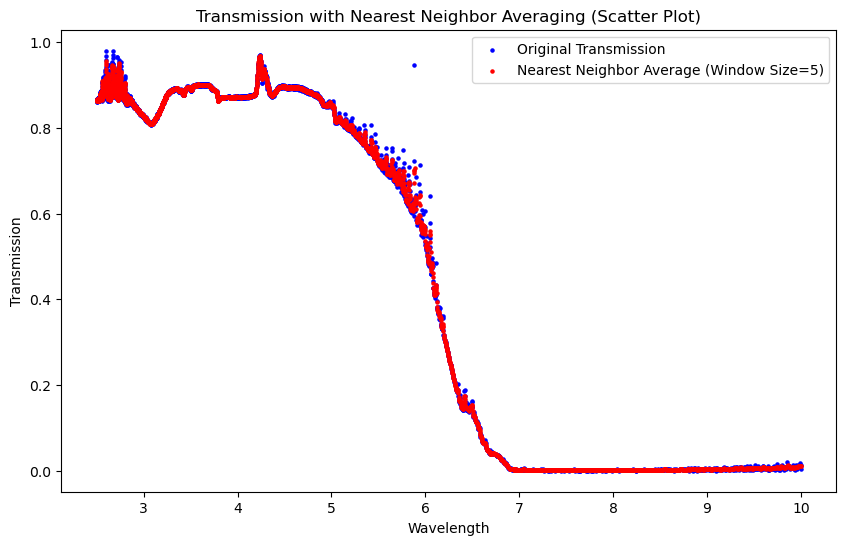

In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

def nearest_neighbor_average(data, index, window_size):
    start_index = max(0, index - window_size // 2)
    end_index = min(len(data), index + window_size // 2 + 1)
    neighbors = data[start_index:end_index]
    return np.mean(neighbors)

def process_and_save(file_path, window_size=5):
    df = pd.read_csv(file_path, delimiter=' ', header=None)
    wavelength = df[0]
    transmission = df[1]

    # Apply nearest neighbor averaging to the transmission values
    smoothed_transmission = [nearest_neighbor_average(transmission, i, window_size) for i in range(len(transmission))]

    # Save only the new transmission values along with the original wavelength to a text file
    result_df = pd.DataFrame({'Wavelength': wavelength, 'Smoothed_Transmission': smoothed_transmission})
    
    # Create a new file name based on the original file name
    file_name, file_extension = os.path.splitext(os.path.basename(file_path))
    output_file_path = os.path.join(os.path.dirname(file_path), f'nearest_n_avg_{file_name}.txt')
    
    result_df.to_csv(output_file_path, index=False, sep=' ')

   # Plot the original and smoothed transmission values as a scatter plot with smaller markers
    plt.figure(figsize=(10, 6))
    plt.scatter(wavelength, transmission, label='Original Transmission', color='blue', s=5)
    plt.scatter(wavelength, smoothed_transmission, label=f'Nearest Neighbor Average (Window Size={window_size})', color='red', marker='o', s=5)
    plt.xlabel('Wavelength')
    plt.ylabel('Transmission')
    plt.title('Transmission with Nearest Neighbor Averaging (Scatter Plot)')
    plt.legend()

    plot_output_file_path = os.path.join(os.path.dirname(file_path), f'scatter_plot_{file_name}.png')
    plt.savefig(plot_output_file_path, bbox_inches='tight')

    plt.show()
       
    
    
    
folder_path = '/Users/arpi/data/10.10.23/processed/'

# Get a list of all txt files in the folder
txt_files = glob(os.path.join(folder_path, '*.txt'))

# Iterate through each txt file and apply process_and_save
for txt_file in txt_files:
    process_and_save(txt_file, window_size=5)

